# Exploratory Data Analysis with Python

## Introducción a EDA

El conjunto de datos que vamos a utilizar a lo largo de la sesión se puede encontrar en - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importar las librerias requeridas

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings

#warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

#### Primera mirada al dataset!

Aquí, vamos a utilizar pandas para leer el archivo csv descargado. A continuación, realice una primera mirada al dataset, identificando el número de filas y columnas en el conjunto de datos.



In [280]:
# Importar el dataset

df = pd.read_csv("content/healthcare-dataset-stroke-data.csv")

In [281]:
# Identificar cantidad de filas y columnas
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")


The dataset has 5110 rows and 12 columns


In [282]:
# Revisar los primeros registroc
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [283]:
# Ultimas filas
df.tail()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [284]:
# Ver el dataset completo
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [285]:
# Trasponerlo
df.transpose()


,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
id,9046,51676,31112,60182,1665,56669,53882,10434,27419,60491,...,68398,36901,45010,22127,14180,18234,44873,19723,37544,44679
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female,...,Male,Female,Female,Female,Female,Female,Female,Female,Male,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
hypertension,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private,...,Self-employed,Private,Private,Private,children,Private,Self-employed,Self-employed,Private,Govt_job
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban,...,Rural,Urban,Rural,Urban,Rural,Urban,Urban,Rural,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2


#### Información de los Atributos

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Analizando el dataset

#### Identificar el número de columnas, si hay valores perdidos y también el tipo de características / variables que se encuentran en el conjunto de datos.

In [286]:
print(f'Cantidad de columnas: {len(df.columns)}')
print('------------------------------------')
print(f'Valores perdidos: {df.isnull().sum().sum()}')
print('------------------------------------')
print(df.info())

Cantidad de columnas: 12
------------------------------------
Valores perdidos: 201
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


#### Filtre el dataset considerando por un lado a los datos tipo objeto y por el otro los numericos

In [287]:
# filter categorical variables
df_numericos =  df.select_dtypes(include=['int64', 'float64'])
df_objeto = df.select_dtypes(include=['object'])

#### ¿Qué persona tiene el IMC máximo del conjunto de datos?

In [288]:
df.loc[df['bmi'].idxmax()][['id','bmi']]

id     56420
bmi     97.6
Name: 2128, dtype: object

#### Preguntas sobre la mirada inicial

 1. ¿Está correlacionado la variable gender con stroke? ¿Tienen más probabilidades de sufrirlo los hombres o las mujeres?

In [289]:
df['gender_numerico'] = df['gender'].replace({'Female': 0, 'Male': 1, 'Other':0},regex=True)
df['gender_numerico'].corr(df['stroke'])

0.009117154023008696

Practicamente no hay correlacion que implique que el genero tenga algo que ver con el stroke (leve correlacion entre genero masculino y stroke)

## Ejercicio

1. ¿Cuál es el valor de la décima observación de la característica edad desde la parte superior del conjunto de datos?

In [290]:
df.loc[9]['age']


78.0

2. ¿Cuál es el valor de la 7ª observación de la característica bmi desde el fondo del conjunto de datos?

In [291]:
df.iloc[-7]['bmi']

46.9

3. ¿Cuál es el id number y el work_type de la persona con el nivel medio de glucosa más bajo del conjunto de datos?

In [292]:
df.loc[df['avg_glucose_level'].idxmin(), ['id', 'work_type','avg_glucose_level']]

id                     60562
work_type            Private
avg_glucose_level      55.12
Name: 4886, dtype: object

4. Imprime un dataframe filtrado, basado en tres condiciones:

   a) Edad inferior a 30 años
   b) Tipo_residencia es Rural
   c) El sexo es femenino
   
   ¿Cuántas filas hay en el conjunto de datos filtrado?

In [293]:
edad = (df['age'] < 30)
residencia = (df['Residence_type'] == 'Rural')
sexo = (df['gender'] == 'Female')

df_filtrado = df[edad & residencia & sexo]
print(f'Cantidad de filas: {df_filtrado.shape[0]}')
df_filtrado

Cantidad de filas: 430


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numerico
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1,0
292,44338,Female,16.00,0,0,No,children,Rural,110.63,19.5,Unknown,0,0
294,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0,0
312,68249,Female,27.00,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0,0
328,29865,Female,21.00,0,0,No,Private,Rural,89.44,21.9,smokes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,62416,Female,26.00,0,0,Yes,Private,Rural,73.29,27.8,never smoked,0,0
5031,67465,Female,20.00,0,0,No,Private,Rural,117.59,17.1,never smoked,0,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0,0


## Analisis Univariado de datos

Utilice una función que nos ayude a imprimir algunos estadísticos resumidos básicos como el recuento, la media, la desviación típica, el valor máximo, el valor mínimo y los percentiles 25, 50 y 75 de cada una de las variables. 

In [294]:
df.describe()



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_numerico
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.413894
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320,0.492578
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000


#### Variable Target - Stroke

Analice la distribución de la variable target y grafique en un grafico de sectores (torta)

In [295]:
# Obser si el dataset esta desbalanceado, contando las ocurrencias de cada valor de la variable
stroke_distr = df['stroke'].value_counts()
stroke_distr

0    4861
1     249
Name: stroke, dtype: int64

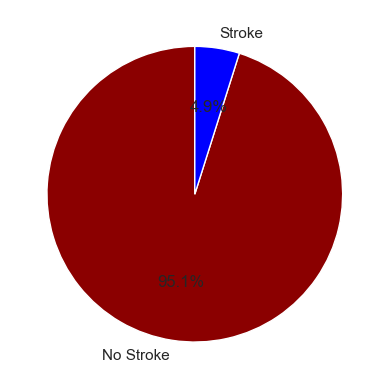

In [296]:
# stroke - pie chart
plt.pie(stroke_distr, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=['darkred','blue'])
plt.show()

#### Variables numéricas Continuas - age, avg_glucose_level, bmi

**Histograma**

Un histograma muestra datos numéricos agrupándolos en "intervalos" de igual anchura. Cada intervalo se representa como una barra cuya altura corresponde al número de puntos de datos que contiene.

<Axes: xlabel='age', ylabel='Count'>

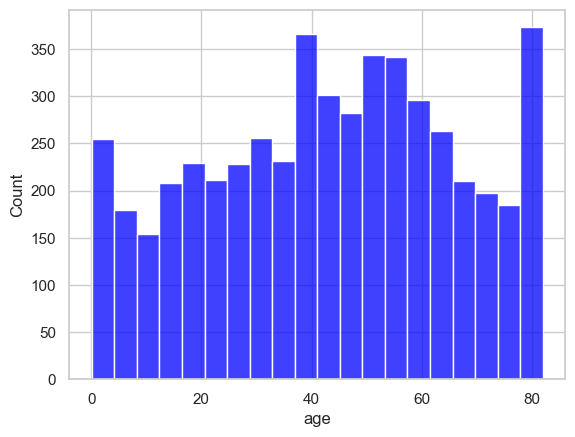

In [297]:
# Gráfico simple - age
sns.histplot(df['age'], color='blue')


<Axes: xlabel='age', ylabel='Count'>

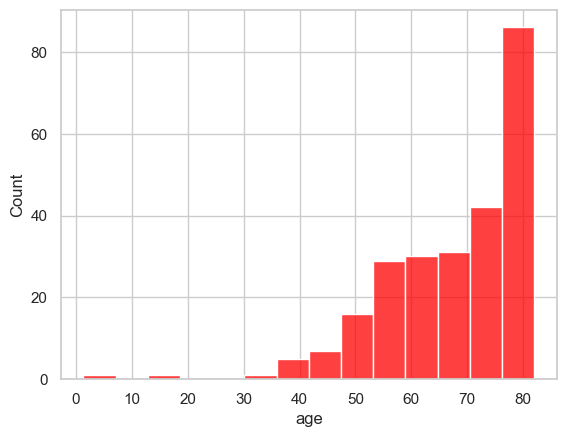

In [298]:
# Histograma de "age" en gente con "stroke"
sns.histplot(df[df['stroke'] == 1]['age'], color='red')



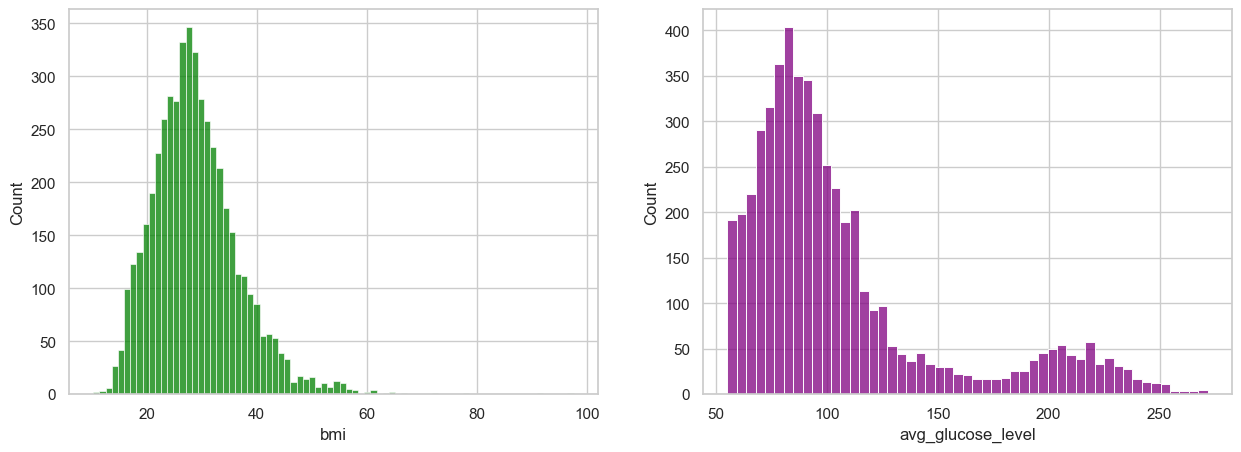

In [299]:
# subplots - bmi, avg_glucose_level

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['bmi'], color='green', ax=ax[0])
sns.histplot(df['avg_glucose_level'], color='purple', ax=ax[1])
plt.show()

#### Boxplots and Outliers

Un diagrama de caja es una forma estandarizada de mostrar la distribución de los datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos y cuáles son. También puede indicarle si sus datos son simétricos, con qué precisión están agrupados y si están sesgados y de qué forma.

Represente en Diagramas de Cajas / Boxplot las variables númericas del punto anterior e interprete los resultados

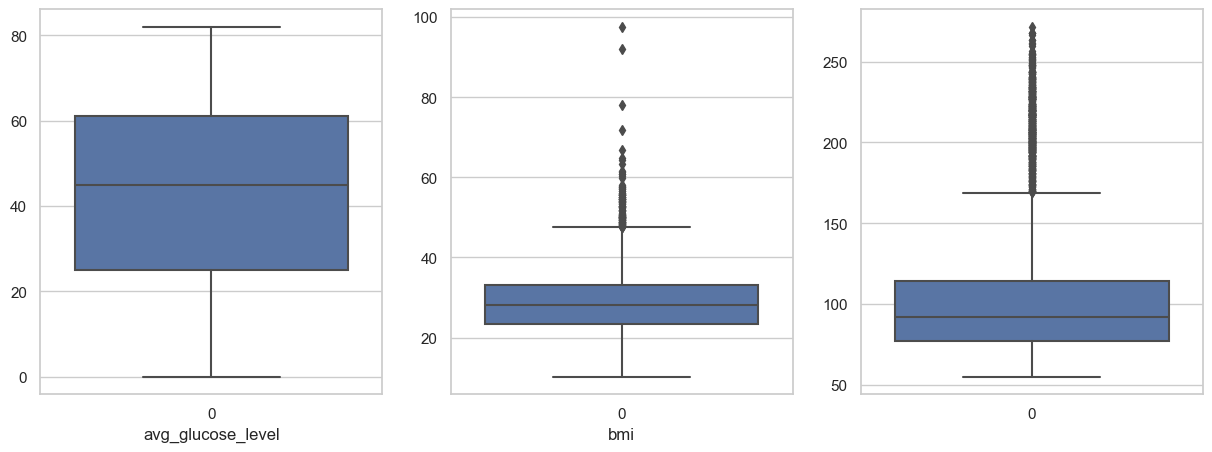

In [300]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(df['age'], ax=ax[0])
ax[0].set_xlabel('age')

sns.boxplot(df['bmi'], ax=ax[1])
ax[1].set_xlabel('bmi')

sns.boxplot(df['avg_glucose_level'], ax=ax[2])
ax[0].set_xlabel('avg_glucose_level')

plt.show()


#### ¿Debemos eliminar o mantener los valores atípicos?

No los eliminaria, representan una parte demasiaod importante de la muestra como para desecharlas. Ademas no parecen errores de medicion, sino valores reales.

#### Variables Categoricas - gender, ever_married, work_type, residence_type, smoking_status

In [301]:
# Utilice la funcion describe para analizar las columnas no numericas
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  gender_numerico    5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


#### Diagrama de Barras

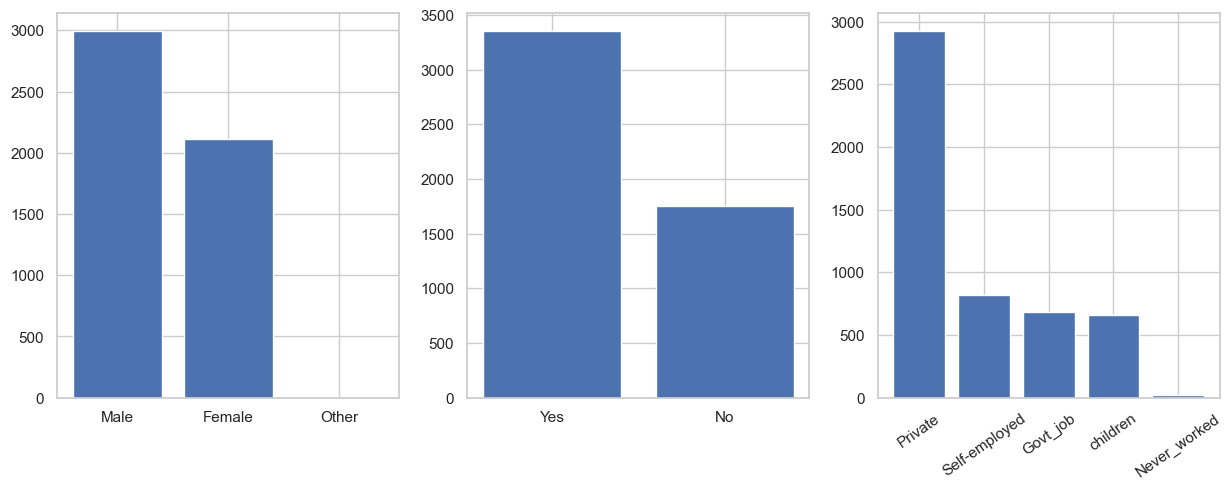

In [302]:
#  Diagrama de Barras para gender, ever_married y work_type
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].bar(df['gender'].unique(), df['gender'].value_counts().values)
ax[1].bar(df['ever_married'].unique(), df['ever_married'].value_counts().values)
ax[2].bar(df['work_type'].unique(), df['work_type'].value_counts().values)
ax[2].xaxis.set_tick_params(rotation=35)

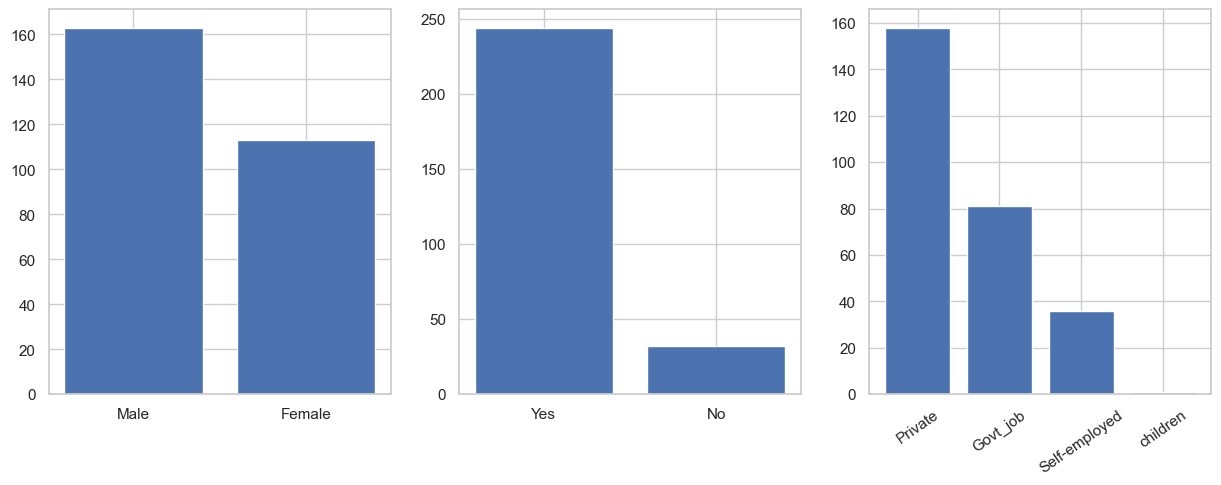

In [303]:
# Lo mismo que arriba para las personas que han sufrido la enfermedad
df_heart = df[df['heart_disease'] == 1]
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].bar(df_heart['gender'].unique(), df_heart['gender'].value_counts().values)
ax[1].bar(df_heart['ever_married'].unique(), df_heart['ever_married'].value_counts().values)
ax[2].bar(df_heart['work_type'].unique(), df_heart['work_type'].value_counts().values)
ax[2].xaxis.set_tick_params(rotation=35)

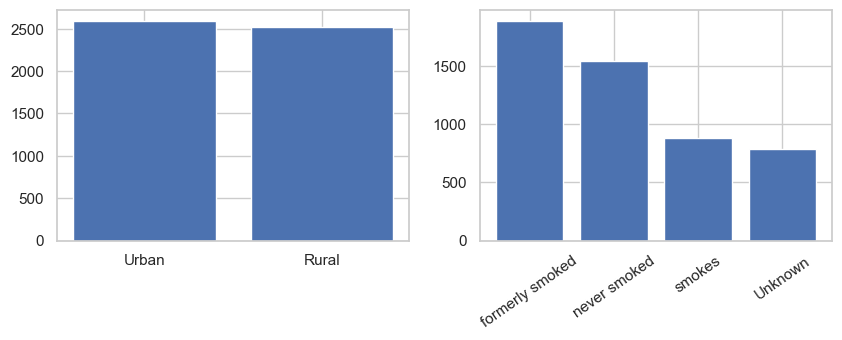

In [304]:
#  Diagrama de Barras para residence_type y smoking_status
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].bar(df['Residence_type'].unique(), df['Residence_type'].value_counts().values)
ax[1].bar(df['smoking_status'].unique(), df['smoking_status'].value_counts().values)
ax[1].xaxis.set_tick_params(rotation=35)
plt.show()


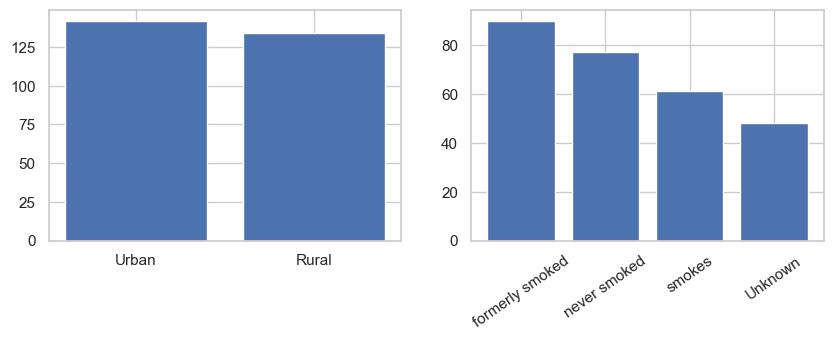

In [305]:
# Lo mismo que arriba pero para personas que sufrieron la enfermedad
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].bar(df_heart['Residence_type'].unique(), df_heart['Residence_type'].value_counts().values)
ax[1].bar(df_heart['smoking_status'].unique(), df_heart['smoking_status'].value_counts().values)
ax[1].xaxis.set_tick_params(rotation=35)
plt.show()


## Analisis Bivariado

#### ¿Las personas mayores tienden a tener más accidentes cerebrovasculares? (Ayudese con un Diagrama de Cajas comparativo)

In [306]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numerico
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1


#### Existe una conexión entre el tipo de trabajo que realiza y su índice de masa corporal? (Utilice violinplot)

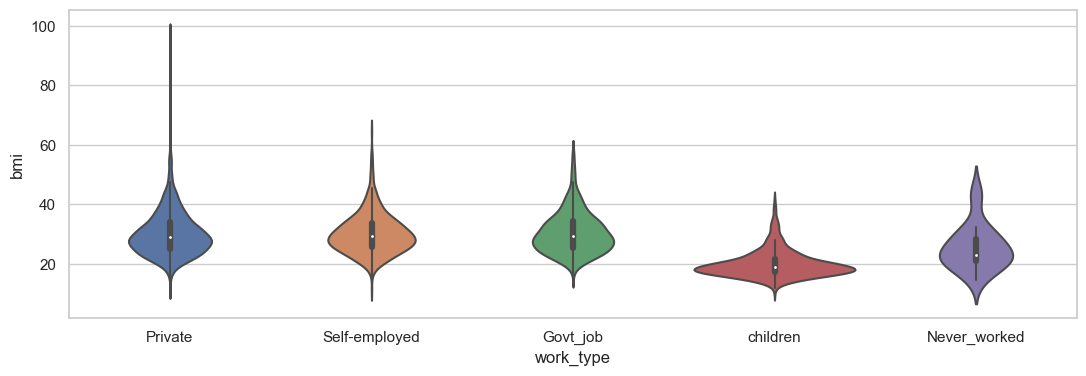

In [307]:
plt.figure(figsize=(13, 4))
sns.violinplot(x='work_type', y='bmi', data=df)
plt.show()

#### ¿Las personas mayores tienen un nivel de glucosa promedio más alto? (Ayudese utilizando un scatterplot)

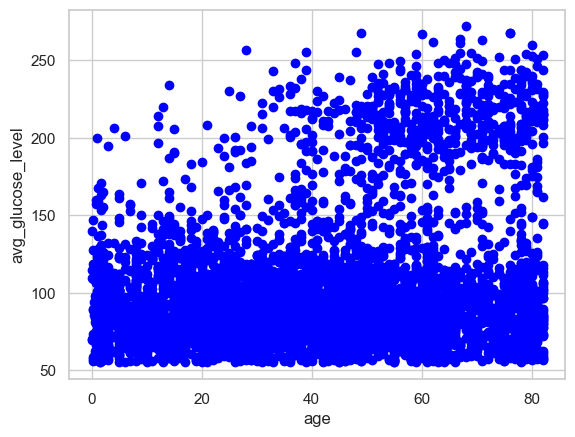

In [308]:
plt.scatter(df['age'], df['avg_glucose_level'], color='blue')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.show()

Si, las personas mayores tienen un nivel de glucosa mas alto.

#### Tabaquismo frente a accidente cerebrovascular y tipo de trabajo frente a hipertensión (realice la comparacion utilizando countplot)

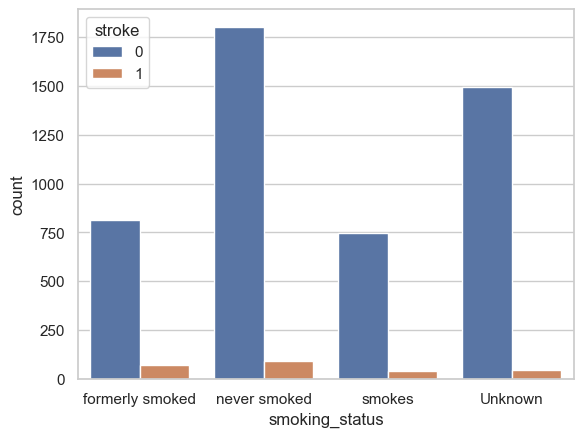

In [309]:
sns.countplot(x='smoking_status', hue = 'stroke', data=df)
plt.show()

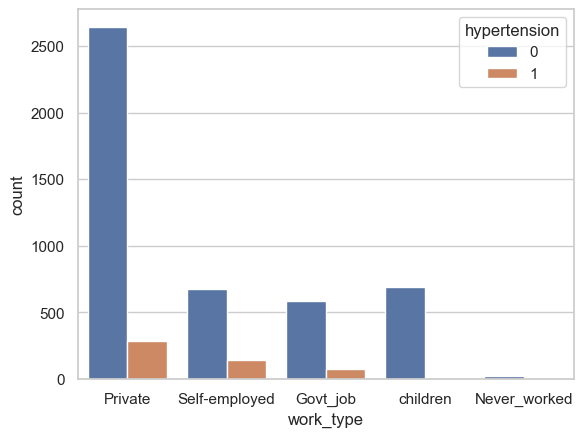

In [310]:
sns.countplot(x='work_type', hue = 'hypertension', data=df)
plt.show()

## Ejercicio

   
Crea una figura de 3 subplots para responder las siguientes preguntas:
   
   a) ¿Cuál es el porcentaje de personas con hipertensión en el conjunto de datos?
   
   b) En los diferentes valores dentro de la característica ""smoking_status"", ¿los hombres superan en número a las mujeres en alguno de ellos?
   
   c) ¿Qué me puede decir sobre la relación entre el tipo de trabajo y la edad?
   
   Todas las figuras deben contener títulos.

In [311]:
pctg_hypertension = df['hypertension'].value_counts()
work_age = df.groupby('work_type').agg({'age':'mean'})


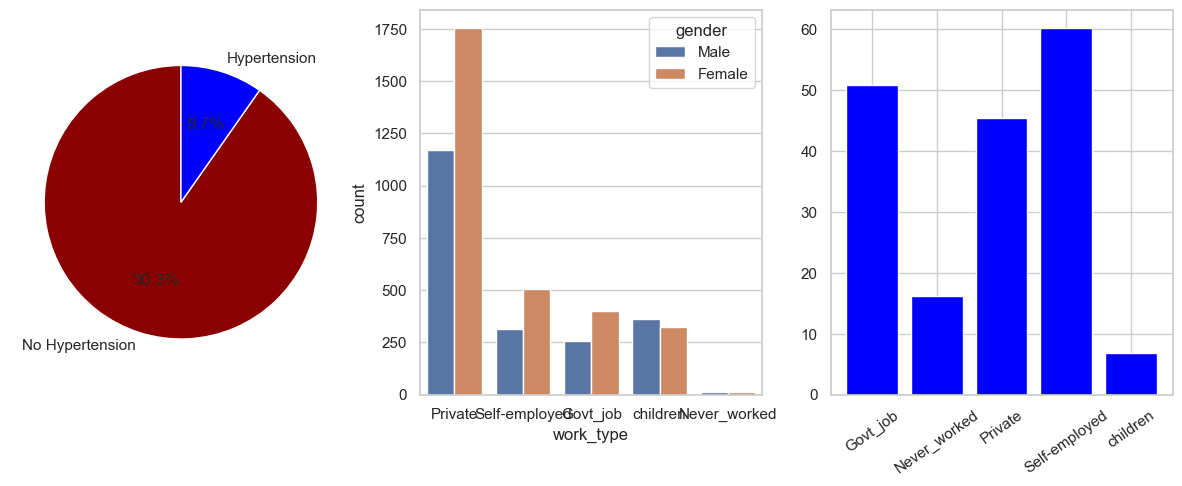

In [312]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].pie(pctg_hypertension, labels=['No Hypertension', 'Hypertension'], autopct='%1.1f%%', startangle=90, colors=['darkred','blue'])
sns.countplot(x='work_type', hue = 'gender', data=df[df['gender'] != 'Other'], ax = ax[1])
ax[2].bar(work_age.index, work_age['age'].values, color = 'blue')
ax[2].xaxis.set_tick_params(rotation=35)
plt.show()

## Missing Data

Analice las variabels con valores nulos y calcule los porcentajes de dichos valores por variable

In [313]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
gender_numerico        0
dtype: int64

In [314]:
print(f"Porcentaje de nulos: {round(df['bmi'].isnull().sum()/len(df) * 100, 2)}%")

Porcentaje de nulos: 3.93%


Imprima los registros del data set con valores faltantes

In [315]:
df[df.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_numerico
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,0
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,1
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,1
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,1


Crear un flag para indicar los valores faltantes para las variables con valores nulos

Rellene los valores faltantes con la media

In [316]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

## Análisis de Correlación


Analice la correlación entre las variables, presente un heatmap y extraiga conclusiones

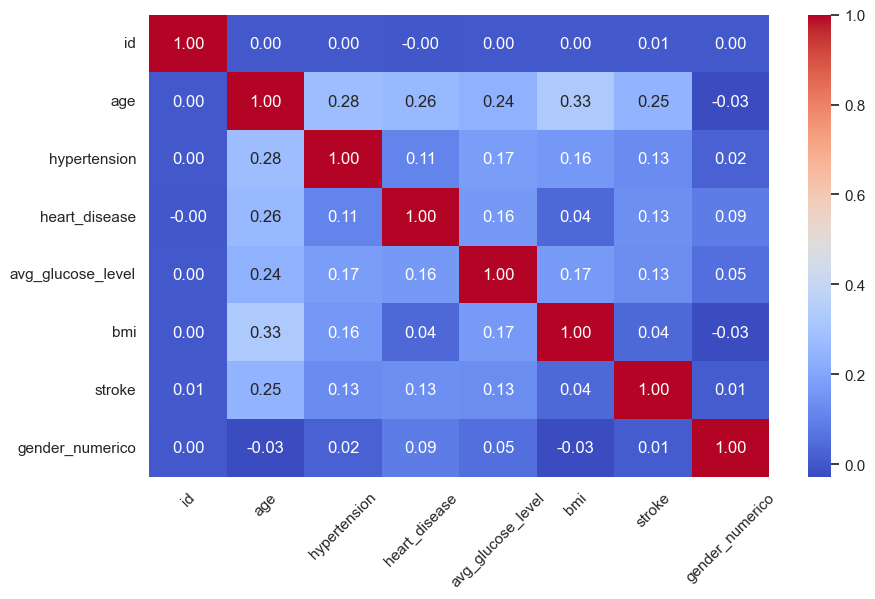

In [317]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap= 'coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.show()

No hay ningun dato fuera de lo normal. Hay cierta correlacion logica entre la edad y los problemas de salud.